In [1]:
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
suppressMessages(library(dplyr))
suppressMessages(library(Rtsne))

In [97]:
dev.off()

null device 
          1

In [2]:
predata <- read.table("/home/xieyufeng/fig3/output/cfRNA/matrix_processing/filter.null.Norm_TMM.mirna_and_domains.txt", header = T, check.names = F)
predata <- as.data.frame(t(predata))
postdata <- read.table("/home/xieyufeng/fig3/output/cfRNA/matrix_processing/filter.null.Norm_TMM.Batch_RUV.mirna_and_domains.txt", header = T, row.names = 1, sep = "\t", check.names = F)
postdata <- as.data.frame(t(postdata))
batch_info <- read.table("/home/xieyufeng/fig3/data/cfRNA/batch_info.txt", header = T,row.names = 1, stringsAsFactors = T)
sample_classes <- read.table("/home/xieyufeng/fig3/data/cfRNA/sample_classes.txt", header = T,row.names = 1, sep = "\t")


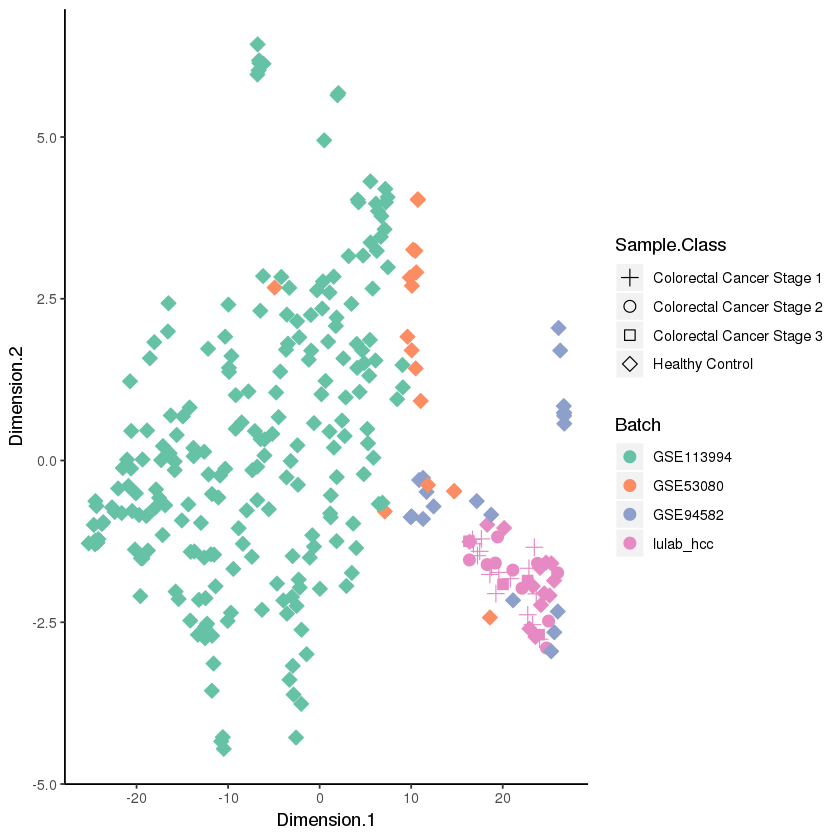

In [209]:
draw_2Dplot(predata, batch_info, sample_classes, 3)

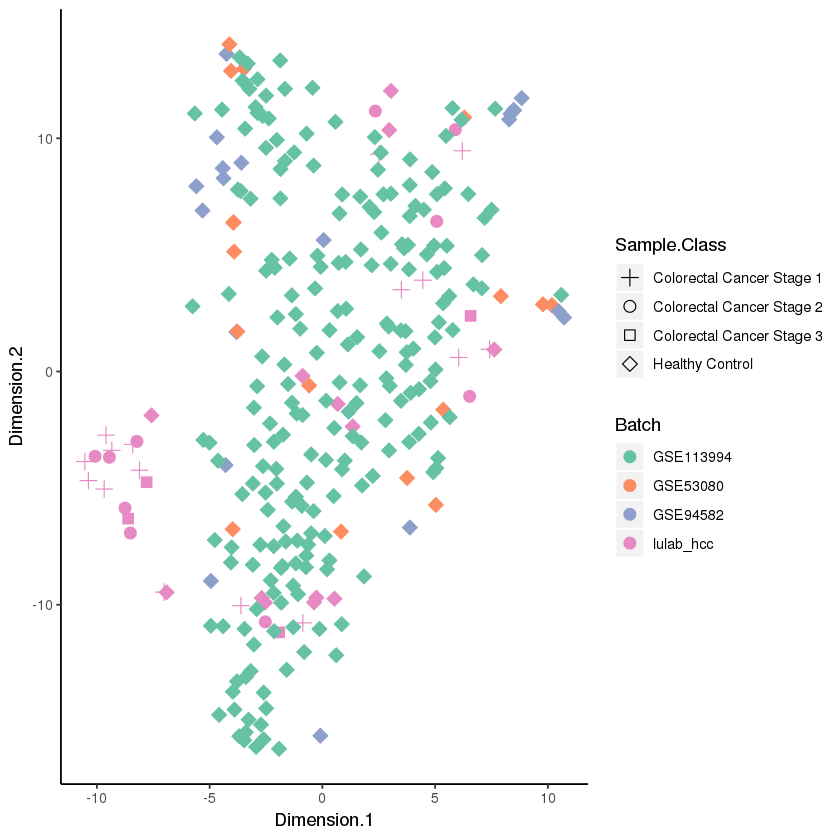

In [210]:
draw_2Dplot(postdata, batch_info, sample_classes, 3)

In [205]:
draw_2Dplot <- function(data, batch, type, point_size){
    p <- Rtsne(data, dims = 2)
    dat <- as.data.frame(p$Y)
    dat$name <- row.names(data)
    batch$name <- row.names(batch)
    type$name <- row.names(type)
    dat <- arrange(dat, desc(name))
    check_to_test1 <<- dat
    check_to_test2 <<- batch
    check_to_test3 <<- type
    foo <- merge(batch, type, by = "name")
    foo <- merge(foo, dat, by = "name")
    foo <- foo[,-1]
    names(foo) <- c("Batch", "Sample.Class", "Dimension.1", "Dimension.2")
    foo$Batch <- factor(foo$Batch)
    foo$Sample.Type <- factor(foo$Sample.Class)
    s <- ggplot(data = foo, aes(x = Dimension.1, y = Dimension.2, col = Batch, shape = Sample.Class, fill = Batch))  + geom_point(, size = point_size)
    s <- s + scale_color_brewer(palette="Set2") + scale_shape_manual(values = c(3, 21:25)) + scale_fill_brewer(palette="Set2") + 
            theme(panel.grid.major =element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            axis.line = element_line(colour = "black")) 
    file_name <- paste(substitute(data), ".pdf", sep = "")
    png(file = file_name)
    s
    dev.off()
    return(s)
}

In [182]:
head(check_to_test1)
head(check_to_test2)
head(check_to_test3)

V1        V2       name      
1 -16.30800 5.095356 X8397116.B
2 -20.36052 2.885984 X6474170.B
3 -20.28133 2.772714 X5474594.B
4 -21.96531 4.708316 X515292.B 
5 -18.51781 5.466579 X515058.B 
6 -19.64193 7.372033 X511485.B

dataset   name      
17402567-B lulab_hcc 17402567-B
249136-B   lulab_hcc 249136-B  
385247-B   lulab_hcc 385247-B  
497411-B   lulab_hcc 497411-B  
498221-B   lulab_hcc 498221-B  
507450-B   lulab_hcc 507450-B

label                     name      
17402567-B Colorectal Cancer Stage 1 17402567-B
249136-B   Colorectal Cancer Stage 1 249136-B  
385247-B   Colorectal Cancer Stage 1 385247-B  
497411-B   Colorectal Cancer Stage 1 497411-B  
498221-B   Colorectal Cancer Stage 1 498221-B  
507450-B   Colorectal Cancer Stage 1 507450-B

In [2]:
predata <- read.table("filter.scimpute_count.Norm_RLE.Batch_null.domains_combined.txt", header = T, row.names = 1, sep = "\t")
postdata <- read.table("filter.scimpute_count.Norm_RLE.Batch_RUV.domains_combined.txt", header = T, row.names = 1, sep = "\t")

In [3]:
batch_info <- read.table("~/Bioinfos/data/scirep_batch.txt", sep = ",", header = T, row.names = 1, stringsAsFactors = T)
batch_info$RNA.Isolation.batch <- factor(batch_info$RNA.Isolation.batch)
batch_temp <- batch_info
batch_temp$names <- rownames(batch_info)
batch_temp <- arrange(batch_temp, names)
rownames(batch_temp) <- batch_temp$names
batch_info <- as.data.frame(batch_temp[,-ncol(batch_temp)])

In [4]:
sample_class <- as.data.frame(c(rep("Colorectal Cancer", times = 100), rep("Normal", times = 50), 
                                rep("Pancratic Cancer", times = 6), rep("Prostate Cancer", times = 36)))

In [5]:
temp <- as.data.frame(t(predata))
temp$names <- rownames(temp)
temp <- arrange(temp, names)
rownames(temp) <- temp$names
predata <- as.data.frame(temp[,-ncol(temp)])

temp <- as.data.frame(t(postdata))
temp$names <- rownames(temp)
temp <- arrange(temp, names)
rownames(temp) <- temp$names
postdata <- as.data.frame(temp[,-ncol(temp)])

In [6]:
p <- Rtsne(predata, dims = 2)

In [7]:
pre_p <- as.data.frame(cbind(batch_info$RNA.Isolation.batch, p$Y))
names(pre_p) <- c("RNA.Isolation.batch", "Dimension_1", "Dimension_2")
pre_p$RNA.Isolation.batch <- factor(pre_p$RNA.Isolation.batch)
pre_p$Type <- sample_class

In [17]:
batch_info

RNA.Isolation.batch library.prepration.day gel.cut.size.selection
Sample_1S1  2                   22                      7                    
Sample_1S10 3                   24                      1                    
Sample_1S11 3                   24                      2                    
Sample_1S12 3                   25                      7                    
Sample_1S13 4                   26                      2                    
Sample_1S14 4                   26                      6                    
Sample_1S15 4                   26                      5                    
Sample_1S16 5                   26                      4                    
Sample_1S17 5                   26                      3                    
Sample_1S18 5                   25                      6                    
Sample_1S19 7                   25                      1                    
Sample_1S2  2                   22                      8                    
Sample_1S20 7                   24                     12                    
Sample_1S21 7                   26                      5                    
Sample_1S22 8                   24                      4                    
Sample_1S23 8                   26                      6                    
Sample_1S24 8                   24                     11                    
Sample_1S25 3                   24                     10                    
Sample_1S3  2                   22                      1                    
Sample_1S4  6                   22                      7                    
Sample_1S5  6                   22                      8                    
Sample_1S6  6                   23                      1                    
Sample_1S7  1                   24                      1                    
Sample_1S8  1                   24                      2                    
Sample_1S9  1                   23                      1                    
Sample_2S1  2                   22                      2                    
Sample_2S10 3                   24                      4                    
Sample_2S11 3                   24                      5                    
Sample_2S12 3                   24                      6                    
Sample_2S13 4                   25                      7                    
⋮           ⋮                   ⋮                      ⋮                     
Sample_PC15 1                   23                     5                     
Sample_PC16 1                   23                     6                     
Sample_PC17 1                   24                     1                     
Sample_PC18 3                   24                     5                     
Sample_PC19 3                   24                     6                     
Sample_PC2  2                   22                     4                     
Sample_PC20 3                   24                     8                     
Sample_PC21 4                   25                     8                     
Sample_PC22 4                   26                     6                     
Sample_PC23 4                   26                     1                     
Sample_PC24 4                   26                     3                     
Sample_PC25 4                   26                     2                     
Sample_PC26 4                   26                     4                     
Sample_PC27 5                   25                     4                     
Sample_PC28 5                   25                     3                     
Sample_PC29 5                   25                     2                     
Sample_PC3  2                   22                     5                     
Sample_PC30 5                   25                     1                     
Sample_PC31 7                   25                     5                     
Sample_PC32 7                   25

In [24]:
draw_2Dplot <- function(data, batch, type, point_size){
    p <- Rtsne(data, dims = 2)
    foo <- as.data.frame(cbind(batch, type, p$Y))
    names(foo) <- c("Batch", "Sample.Type", "Dimension.1", "Dimension.2")
    foo$Batch <- factor(foo$Batch)
    foo$Sample.Type <- factor(foo$Sample.Type)
    s <- ggplot(data = foo, aes(x = Dimension.1, y = Dimension.2, col = Batch, shape = Sample.Type))  + geom_point(size = point_size)
    s <- s + scale_fill_brewer(palette="Set2") + 
            theme(panel.grid.major =element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            axis.line = element_line(colour = "black")) 
    file_name <- paste(substitute(data), ".pdf", sep = "")
    pdf(file = file_name)
    s
    dev.off()
    return(s)
}

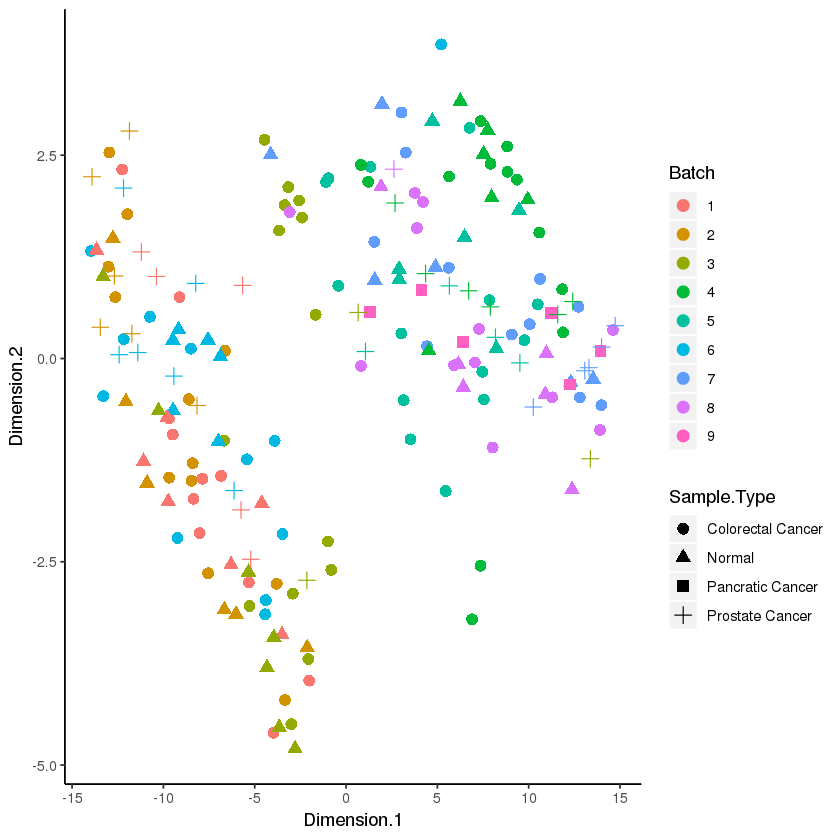

In [27]:
draw_2Dplot(predata, batch_info$RNA.Isolation.batch, sample_class, 3)

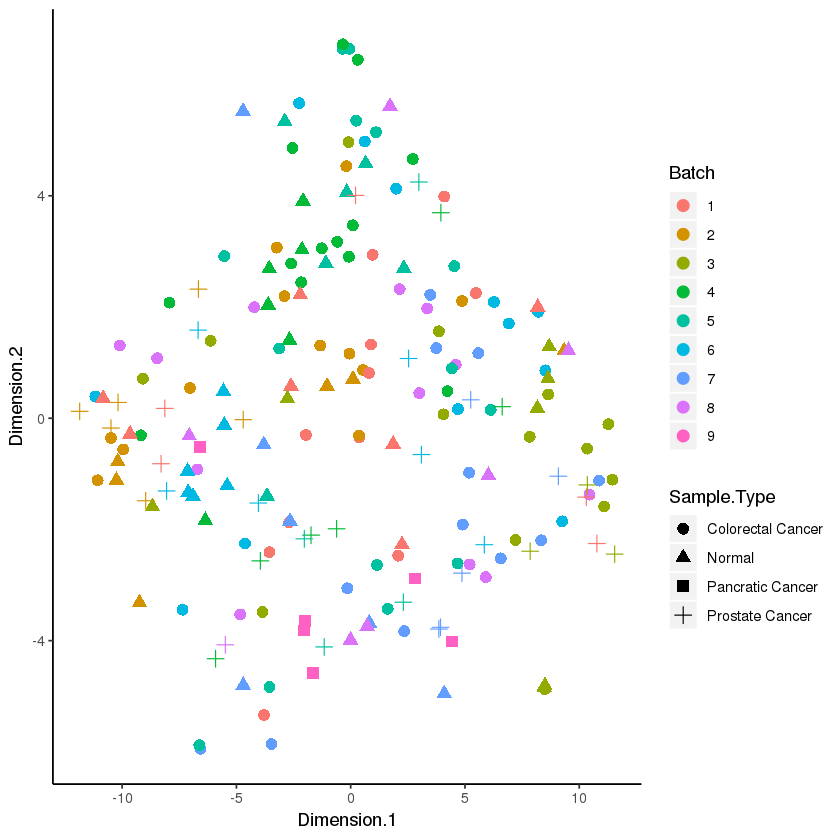

In [28]:
draw_2Dplot(postdata, batch_info$RNA.Isolation.batch, sample_class, 3)